In [3]:
import streamlit as st
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

ticker="MXN=X"
lookback_days=365 * 3
"""Fetch historical exchange rate data."""
from datetime import datetime, timedelta

end_date = datetime.now()
start_date = end_date - timedelta(days=lookback_days)
stock = yf.Ticker(ticker)
df = stock.history(start=start_date.strftime("%Y-%m-%d"), 
                       end=end_date.strftime("%Y-%m-%d"), 
                       interval='1d')



new EDA

In [4]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-03-09 00:00:00+00:00,21.350990,21.358999,20.925699,21.362391,0,0.0,0.0
2022-03-10 00:00:00+00:00,20.904520,21.060040,20.891100,20.905190,0,0.0,0.0
2022-03-11 00:00:00+00:00,20.919069,21.046499,20.841299,20.912001,0,0.0,0.0
2022-03-14 00:00:00+00:00,20.902100,20.977579,20.820601,20.887510,0,0.0,0.0
2022-03-15 00:00:00+00:00,20.896049,20.926140,20.823400,20.900370,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-03 00:00:00+00:00,20.514450,20.533880,20.380470,20.514450,0,0.0,0.0
2025-03-04 00:00:00+00:00,20.725700,20.982740,20.690001,20.725700,0,0.0,0.0
2025-03-05 00:00:00+00:00,20.530500,20.660490,20.350100,20.530500,0,0.0,0.0


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_clean = df.copy()

In [6]:
# Convert index to datetime
df_clean.index = pd.to_datetime(df_clean.index)

# Drop irrelevant columns
df_clean.drop(columns=['Volume', 'Dividends', 'Stock Splits'], inplace=True)

# Check for missing values and duplicates
print("Missing Values:\n", df_clean.isnull().sum())
print("\nDuplicate Rows:", df_clean.duplicated().sum())

Missing Values:
 Open     0
High     0
Low      0
Close    0
dtype: int64

Duplicate Rows: 0


In [7]:
# Summary statistics
print("\nSummary Statistics:\n", df_clean.describe())


Summary Statistics:
              Open        High         Low       Close
count  782.000000  782.000000  782.000000  782.000000
mean    18.715179   18.815903   18.629978   18.715119
std      1.366310    1.378573    1.353671    1.366250
min     16.314301   16.366400   16.247700   16.314301
25%     17.227252   17.375987   17.161325   17.227252
50%     18.778100   18.891880   18.701350   18.778100
75%     20.017558   20.111253   19.934553   20.017558
max     21.350990   21.358999   20.925699   21.362391


UNIVARIATE ANALYSIS

Text(0.5, 1.0, 'Close Price Distribution')

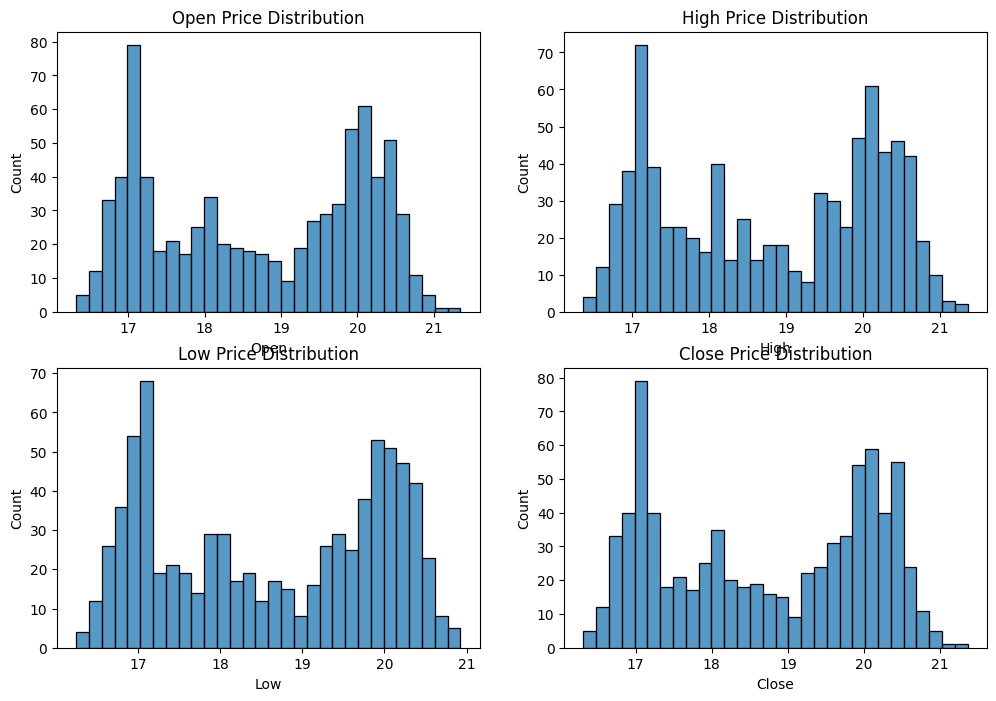

In [10]:
# --- UNIVARIATE ANALYSIS ---
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from PIL import Image

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(df_clean["Open"], bins=30, ax=axes[0, 0])
axes[0, 0].set_title("Open Price Distribution")

sns.histplot(df_clean["High"], bins=30, ax=axes[0, 1])
axes[0, 1].set_title("High Price Distribution")

sns.histplot(df_clean["Low"], bins=30, ax=axes[1, 0])
axes[1, 0].set_title("Low Price Distribution")

sns.histplot(df_clean["Close"], bins=30, ax=axes[1, 1])
axes[1, 1].set_title("Close Price Distribution")




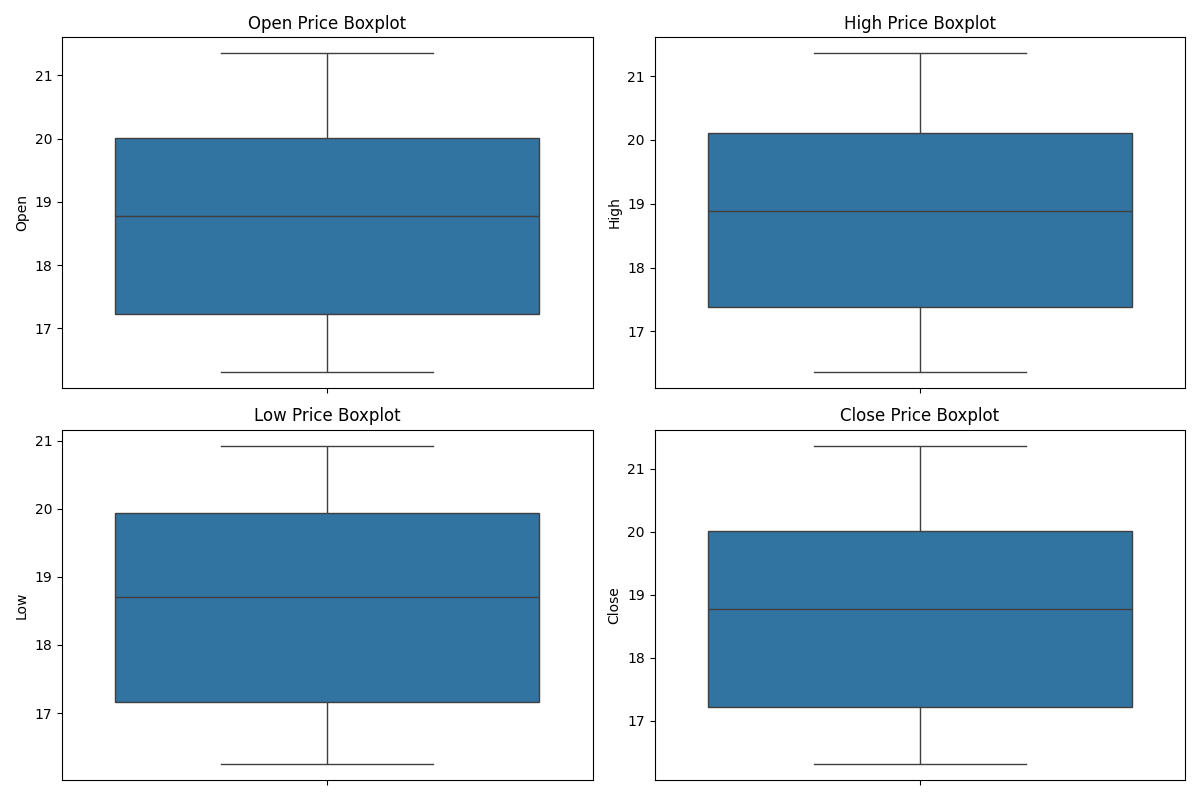

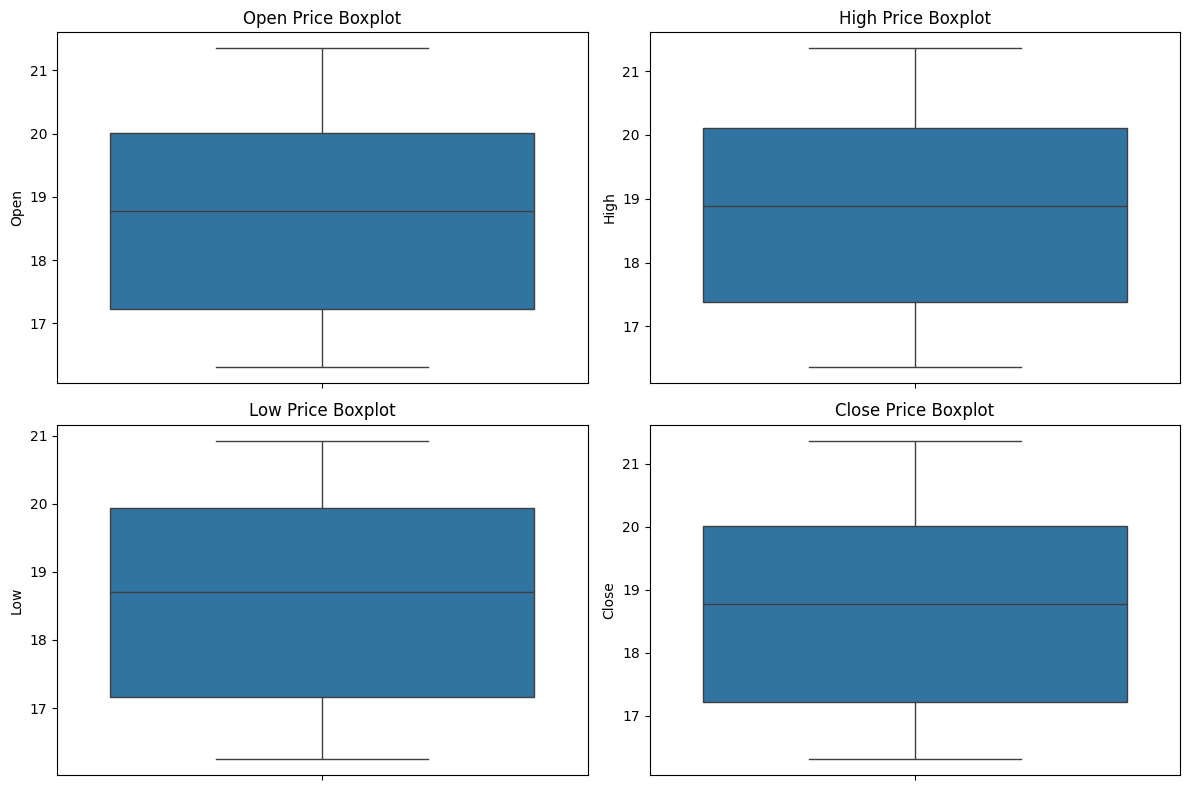

In [11]:
#BOXPLOT FOR OUTLIERS
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from PIL import Image

# Create the figure
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.boxplot(y=df_clean["Open"], ax=axes[0, 0])
axes[0, 0].set_title("Open Price Boxplot")

sns.boxplot(y=df_clean["High"], ax=axes[0, 1])
axes[0, 1].set_title("High Price Boxplot")

sns.boxplot(y=df_clean["Low"], ax=axes[1, 0])
axes[1, 0].set_title("Low Price Boxplot")

sns.boxplot(y=df_clean["Close"], ax=axes[1, 1])
axes[1, 1].set_title("Close Price Boxplot")

plt.tight_layout()
plt.savefig("boxplot.png")  # Save plot as image

# Display the saved image inside the notebook
image = Image.open("boxplot.png")
display(image)